# Polypy

### Tutorial 1 

In [1]:
from polypy import read as rd
from polypy import density as Dens
from polypy import utils as ut
from polypy import write as wr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
timestep = 0.25
data = rd.read_history("example_data/HISTORY", ["CA", "F"])

In [3]:
# Create Density object

total_density = Dens.Density(data)
ca_density = Dens.Density(data, atom_type="CA")
f_density = Dens.Density(data, atom_type="F")

Multiple atom types detected - Splitting Coordinates


In [4]:
plane = total_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of U and O Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

plane = ca_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of U Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

plane = f_density.one_dimensional_density_sb(ul=5.0, ll=-5.0)
print("Total Number of O Between -5.0 - 5.0 :", plane, " across ", data['timesteps'], "timesteps")

Total Number of U and O Between -5.0 - 5.0 : 268003  across  500 timesteps
Total Number of U Between -5.0 - 5.0 : 77999  across  500 timesteps
Total Number of O Between -5.0 - 5.0 : 190004  across  500 timesteps


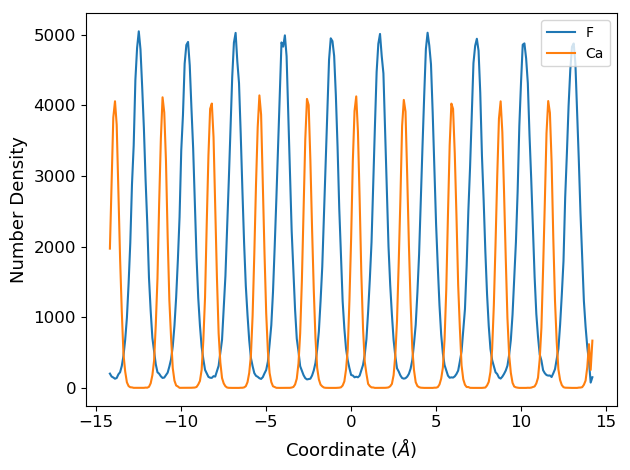

In [5]:
# 4) One Dimensional Density Plot
tx, ty = total_density.one_dimensional_density(Bin=0.1, direction="x")
cx, cy = ca_density.one_dimensional_density(Bin=0.1, direction="x")
fx, fy = f_density.one_dimensional_density(Bin=0.1, direction="x")

wr.one_dimensional_density_plot([fx, cx], [fy, cy], ["F", "Ca"])

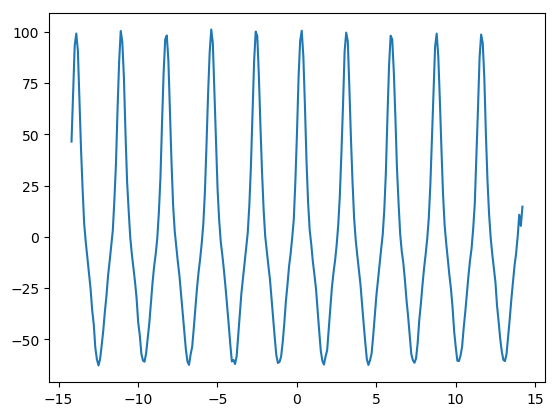

In [6]:
bin_volume = 0.1 * np.mean(data['lv'][:,1] * np.mean(data['lv'][:,2]))
charge_density = ut.charge_density([fy, cy], [-1.0, 2.0], bin_volume)
plt.plot(fx, charge_density)
plt.show()

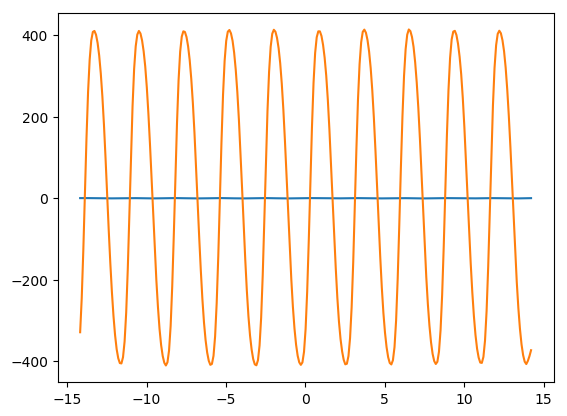

In [7]:
dx, e_field, potential = ut.poisson_solver(fx, charge_density, data['timesteps'])

plt.plot(dx, potential)
plt.plot(dx, e_field)
plt.show()

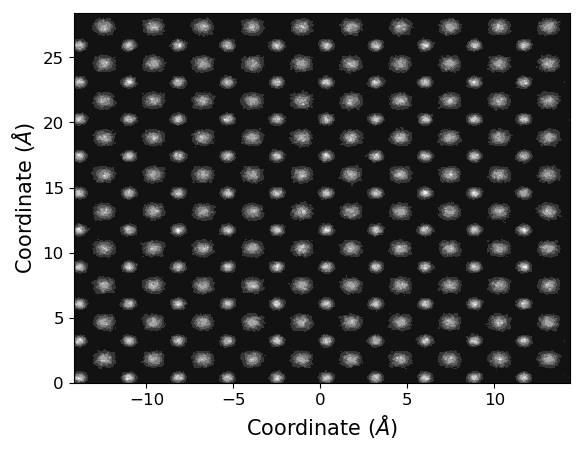

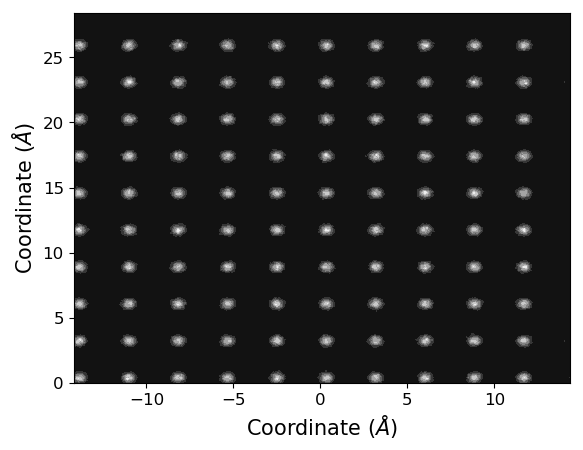

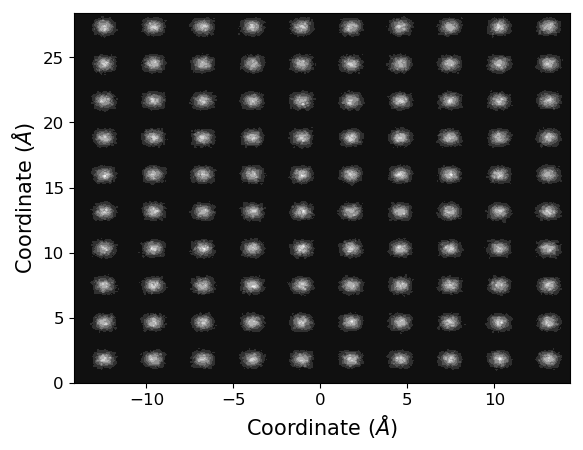

In [8]:
# 5) Two Dimensional Density Plot

tx, ty, tz = total_density.two_dimensional_density(box=0.1)
cx, cy, cz = ca_density.two_dimensional_density(box=0.1)
fx, fy, fz = f_density.two_dimensional_density(box=0.1)

wr.two_dimensional_density_plot(tx, ty, tz)
wr.two_dimensional_density_plot(cx, cy, cz)
wr.two_dimensional_density_plot(fx, fy, fz)

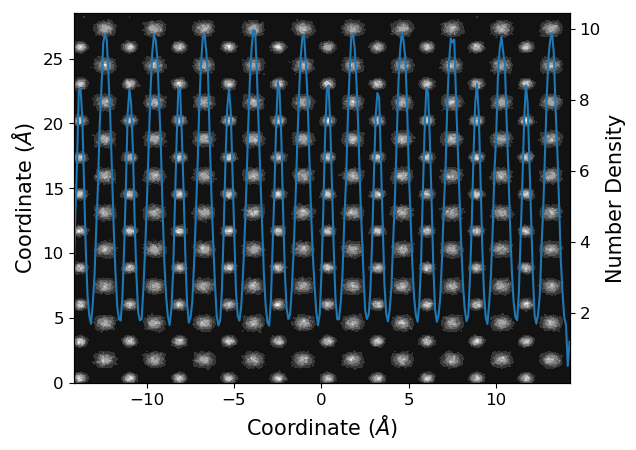

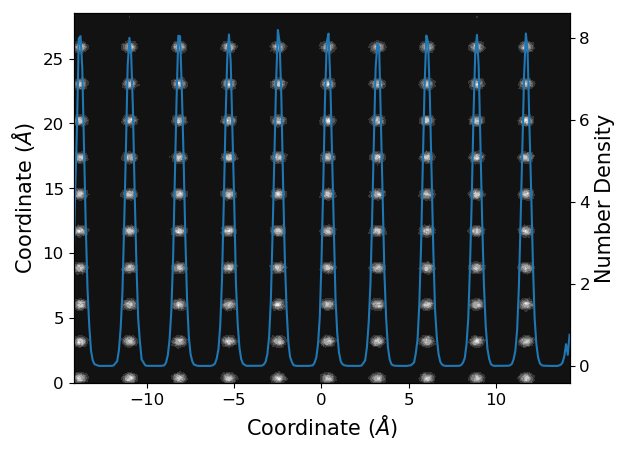

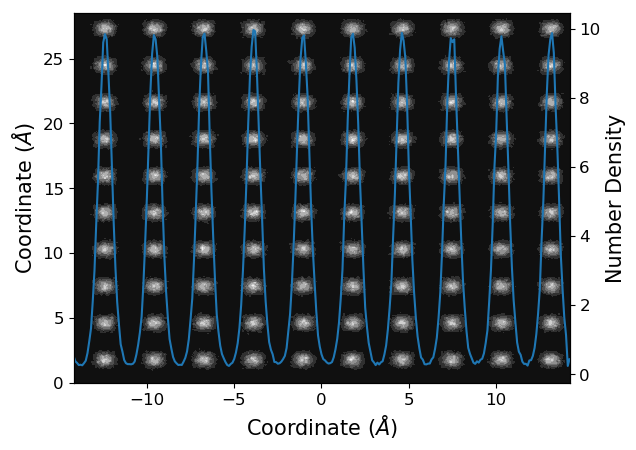

In [9]:
tx, ty, tz, ty2 = total_density.one_and_two_dimension_overlay(box=0.1)
cx, cy, cz, cy2 = ca_density.one_and_two_dimension_overlay(box=0.1)
fx, fy, fz, fy2 = f_density.one_and_two_dimension_overlay(box=0.1)

wr.combined_density_plot(tx, ty, tz, ty2)
wr.combined_density_plot(cx, cy, cz, cy2)
wr.combined_density_plot(fx, fy, fz, fy2)